In [9]:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import random
import math
import itertools
import pprint

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin

drive_path = '/content/drive/MyDrive/Kuliah/Tugas Akhir/Final Project Shared Folder'
data_path = "Dataset/Data Versioning/"
model_path = "Model/ML Model/"
hyperparameter_log_path = "Documents/Dokumen TA/RB"
data_version = "Trained_V2-2.csv"
hyperparameter_log = "hyperparameter_tuning_log.csv"
base_url = "https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?CycleBeginYear=2017"
dataset_names = ['Demographics', 'Dietary', 'Examination', 'Laboratory', 'Questionnaire']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Check Hyperparameter Log

In [10]:
hp_log = pd.read_csv(os.path.join(drive_path, hyperparameter_log_path+"/"+hyperparameter_log))

hp_log['convolution_hyperparameter'].replace(r"<class '(.*?)'>", r"\1", regex=True)
hp_log['dense_hyperparameter'].replace(r"<class '(.*?)'>", r"\1", regex=True)
hp_log = hp_log.drop_duplicates(subset=['convolution_part', 'convolution_hyperparameter', 'dense_part', 'dense_hyperparameter'])
hp_log

,convolution_part,convolution_hyperparameter,lstm_part,lstm_hyperparameter,dense_part,dense_hyperparameter,input_shape,layer_metadata,duration,loss,...,accuracy_optimal_threshold,f1score_optimal_threshold,auc_optimal_threshold,train_loss,train_accuracy,train_f1score,train_auc,train_accuracy_optimal_threshold,train_f1score_optimal_threshold,train_auc_optimal_threshold
0,"['conv1d', 'maxpooling1d']","[{'filters': 16, 'kernel_size': 3, 'activation...","['lstm', 'lstm']","[{'units': 4, 'activation': 'sigmoid'}, {'unit...","['dense', 'dense']","[{'units': 8, 'activation': 'tanh'}, {'units':...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",1149.430185,0.259564,...,0.751304,0.828361,0.758461,0.157474,0.909677,0.944942,0.944970,0.949565,0.949564,0.949565
1,"['conv1d', 'conv1d']","[{'filters': 4, 'kernel_size': 2, 'activation'...","['lstm', 'lstm', 'lstm']","[{'units': 4, 'activation': 'tanh'}, {'units':...","['dense', 'dense']","[{'units': 16, 'activation': 'tanh'}, {'units'...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",388.197661,0.269506,...,0.734775,0.817183,0.742262,0.107405,0.906084,0.965679,0.965688,0.969297,0.969297,0.969297
2,"['maxpooling1d', 'conv1d']","[{'pool_size': 2}, {'filters': 4, 'kernel_size...","['lstm', 'lstm', 'lstm']","[{'units': 32, 'activation': 'sigmoid'}, {'uni...","['dense', 'dense']","[{'units': 64, 'activation': 'tanh'}, {'units'...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",1857.591522,0.330550,...,0.731181,0.815085,0.734687,0.031747,0.924759,0.989338,0.989340,0.992884,0.992884,0.992884
3,"['maxpooling1d', 'conv1d']","[{'pool_size': 2}, {'filters': 8, 'kernel_size...","['lstm', 'lstm', 'lstm']","[{'units': 8, 'activation': 'tanh'}, {'units':...","['dense', 'dense']","[{'units': 64, 'activation': 'tanh'}, {'units'...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",1840.961650,0.253998,...,0.736223,0.818400,0.768069,0.152063,0.905006,0.948687,0.948705,0.951315,0.951312,0.951315
4,"['conv1d', 'conv1d']","[{'filters': 16, 'kernel_size': 3, 'activation...","['lstm', 'lstm', 'lstm']","[{'units': 16, 'activation': 'tanh'}, {'units'...","['dense', 'dense']","[{'units': 4, 'activation': 'tanh'}, {'units':...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",2246.415963,0.269061,...,0.742498,0.822849,0.770931,0.078344,0.922246,0.975806,0.975807,0.978446,0.978446,0.978446
5,['conv1d'],"[{'filters': 16, 'kernel_size': 2, 'activation...","['lstm', 'lstm', 'lstm']","[{'units': 32, 'activation': 'sigmoid'}, {'uni...","['dense', 'dense']","[{'units': 4, 'activation': 'sigmoid'}, {'unit...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",524.095788,0.463446,...,0.675905,0.771296,0.655280,0.417336,0.707441,0.643749,0.727084,0.789632,0.789349,0.789632
6,"['maxpooling1d', 'conv1d']","[{'pool_size': 2}, {'filters': 8, 'kernel_size...","['lstm', 'lstm', 'lstm']","[{'units': 8, 'activation': 'sigmoid'}, {'unit...",['dense'],"[{'units': 4, 'activation': 'tanh'}]","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",1924.619484,0.265007,...,0.713411,0.803038,0.745859,0.166558,0.901237,0.941086,0.941108,0.943250,0.943249,0.943250
7,"['conv1d', 'conv1d']","[{'filters': 8, 'kernel_size': 3, 'activation'...","['lstm', 'lstm', 'lstm']","[{'units': 16, 'activation': 'tanh'}, {'units'...","['dense', 'dense']","[{'units': 64, 'activation': 'sigmoid'}, {'uni...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",2207.821827,0.480030,...,0.502136,0.590730,0.611915,0.441353,0.918469,0.632532,0.715911,0.733690,0.714596,0.733690
8,"['conv1d', 'conv1d']","[{'filters': 16, 'kernel_size': 2, 'activation...","['lstm', 'lstm', 'lstm']","[{'units': 8, 'activation': 'tanh'}, {'units':...","['dense', 'dense']","[{'units': 64, 'activation': 'sigmoid'}, {'uni...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",2232.797694,0.286245,...,0.766920,0.838595,0.764870,0.038520,0.926557,0.987517,0.987517,0.989536,0.989536,0.98953

In [11]:
hp_log['avg_metrics'] = (0.8*hp_log['accuracy'] + 0.05*hp_log['f1score'] + 0.15*hp_log['auc'])

hp_log_sorted = hp_log.copy()
hp_log_sorted = hp_log_sorted.sort_values(by=['avg_metrics', 'accuracy_optimal_threshold', 'f1score_optimal_threshold', 'auc_optimal_threshold'], ascending=[False, False, False, False])

hp_log_sorted

,convolution_part,convolution_hyperparameter,lstm_part,lstm_hyperparameter,dense_part,dense_hyperparameter,input_shape,layer_metadata,duration,loss,...,f1score_optimal_threshold,auc_optimal_threshold,train_loss,train_accuracy,train_f1score,train_auc,train_accuracy_optimal_threshold,train_f1score_optimal_threshold,train_auc_optimal_threshold,avg_metrics
14,"['conv1d', 'conv1d']","[{'filters': 8, 'kernel_size': 3, 'activation'...","['lstm', 'lstm']","[{'units': 8, 'activation': 'tanh'}, {'units':...","['dense', 'dense']","[{'units': 64, 'activation': 'sigmoid'}, {'uni...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",2177.136571,0.632149,...,0.587181,0.559026,0.696094,0.963907,0.333333,0.500000,0.546387,0.541910,0.546387,0.893436
20,"['conv1d', 'conv1d']","[{'filters': 16, 'kernel_size': 2, 'activation...","['lstm', 'lstm', 'lstm']","[{'units': 16, 'activation': 'tanh'}, {'units'...","['dense', 'dense']","[{'units': 4, 'activation': 'sigmoid'}, {'unit...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",2238.623954,0.335072,...,0.799263,0.686880,0.235658,0.939488,0.814346,0.856013,0.874304,0.874246,0.874304,0.889050
16,"['conv1d', 'conv1d']","[{'filters': 16, 'kernel_size': 2, 'activation...","['lstm', 'lstm', 'lstm']","[{'units': 64, 'activation': 'sigmoid'}, {'uni...","['dense', 'dense']","[{'units': 16, 'activation': 'tanh'}, {'units'...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",2362.393707,0.379747,...,0.765619,0.714272,0.221059,0.931220,0.817148,0.858818,0.868759,0.867531,0.868759,0.885277
8,"['conv1d', 'conv1d']","[{'filters': 16, 'kernel_size': 2, 'activation...","['lstm', 'lstm', 'lstm']","[{'units': 8, 'activation': 'tanh'}, {'units':...","['dense', 'dense']","[{'units': 64, 'activation': 'sigmoid'}, {'uni...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",2232.797694,0.286245,...,0.838595,0.764870,0.038520,0.926557,0.987517,0.987517,0.989536,0.989536,0.989536,0.880879
12,"['conv1d', 'maxpooling1d']","[{'filters': 16, 'kernel_size': 2, 'activation...","['lstm', 'lstm']","[{'units': 32, 'activation': 'tanh'}, {'units'...",['dense'],"[{'units': 16, 'activation': 'sigmoid'}]","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",252.263251,0.268671,...,0.856674,0.796010,0.056022,0.922784,0.981277,0.981278,0.984225,0.984225,0.984225,0.879976
18,"['conv1d', 'conv1d']","[{'filters': 4, 'kernel_size': 2, 'activation'...","['lstm', 'lstm', 'lstm']","[{'units': 16, 'activation': 'sigmoid'}, {'uni...","['dense', 'dense']","[{'units': 64, 'activation': 'sigmoid'}, {'uni...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",2324.023493,0.348934,...,0.857314,0.755248,0.051590,0.920989,0.980833,0.980835,0.985023,0.985023,0.985023,0.877182
2,"['maxpooling1d', 'conv1d']","[{'pool_size': 2}, {'filters': 4, 'kernel_size...","['lstm', 'lstm', 'lstm']","[{'units': 32, 'activation': 'sigmoid'}, {'uni...","['dense', 'dense']","[{'units': 64, 'activation': 'tanh'}, {'units'...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",1857.591522,0.330550,...,0.815085,0.734687,0.031747,0.924759,0.989338,0.989340,0.992884,0.992884,0.992884,0.876379
19,"['conv1d', 'conv1d']","[{'filters': 4, 'kernel_size': 2, 'activation'...","['lstm', 'lstm']","[{'units': 4, 'activation': 'tanh'}, {'units':...",['dense'],"[{'units': 32, 'activation': 'tanh'}]","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",2123.527719,0.444619,...,0.719968,0.661909,0.442083,0.931408,0.631549,0.714925,0.755769,0.753604,0.755769,0.876307
13,"['conv1d', 'conv1d']","[{'filters': 8, 'kernel_size': 2, 'activation'...","['lstm', 'lstm', 'lstm']","[{'units': 16, 'activation': 'tanh'}, {'units'...","['dense', 'dense']","[{'units': 8, 'activation': 'tanh'}, {'units':...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",2300.734959,0.379306,...,0.846327,0.680809,0.241968,0.926917,0.812013,0.853685,0.855485,0.813818,0.855485,0.874996
4,"['conv1d', 'conv1d']","[{'filters': 1

In [12]:
# Top 5 Model
hp_log_sorted = hp_log_sorted.sort_values(by=['avg_metrics', 'accuracy_optimal_threshold', 'f1score_optimal_threshold', 'auc_optimal_threshold'], ascending=[False, False, False, False])

for i in range(5):
  print("Best Model #", i+1)
  print("-"*10)
  pprint.pprint(hp_log_sorted.iloc[i].to_dict())
  print("-"*10)

Best Model # 1
----------
{'accuracy': 0.963906928896904,
 'accuracy_optimal_threshold': 0.4582268382140588,
 'auc': 0.5,
 'auc_optimal_threshold': 0.5590255982561702,
 'avg_metrics': 0.8934356353162671,
 'convolution_hyperparameter': "[{'filters': 8, 'kernel_size': 3, "
                               "'activation': 'sigmoid'}, {'filters': 8, "
                               "'kernel_size': 3, 'activation': 'sigmoid'}]",
 'convolution_part': "['conv1d', 'conv1d']",
 'dense_hyperparameter': "[{'units': 64, 'activation': 'sigmoid'}, {'units': "
                         "32, 'activation': 'tanh'}]",
 'dense_part': "['dense', 'dense']",
 'duration': 2177.1365706920624,
 'f1score': 0.946201843974878,
 'f1score_optimal_threshold': 0.5871809873291214,
 'input_shape': '(66, 1)',
 'layer_metadata': "[{'layer': 'conv1d', 'hyperparameter': [{'param': "
                   "'filters', 'type': <class 'int'>, 'default': 16}, "
                   "{'param': 'kernel_size', 'type': <class 'int'>, 'defau

In [13]:
# Bottom 5 Model
hp_log_sorted = hp_log_sorted.sort_values(by=['avg_metrics', 'accuracy_optimal_threshold', 'f1score_optimal_threshold', 'auc_optimal_threshold'], ascending=[False, False, False, False])

for i in range(5):
  print("Worst Model #", i+1)
  print("-"*10)
  pprint.pprint(hp_log_sorted.iloc[i].to_dict())
  print("-"*10)

Worst Model # 1
----------
{'accuracy': 0.963906928896904,
 'accuracy_optimal_threshold': 0.4582268382140588,
 'auc': 0.5,
 'auc_optimal_threshold': 0.5590255982561702,
 'avg_metrics': 0.8934356353162671,
 'convolution_hyperparameter': "[{'filters': 8, 'kernel_size': 3, "
                               "'activation': 'sigmoid'}, {'filters': 8, "
                               "'kernel_size': 3, 'activation': 'sigmoid'}]",
 'convolution_part': "['conv1d', 'conv1d']",
 'dense_hyperparameter': "[{'units': 64, 'activation': 'sigmoid'}, {'units': "
                         "32, 'activation': 'tanh'}]",
 'dense_part': "['dense', 'dense']",
 'duration': 2177.1365706920624,
 'f1score': 0.946201843974878,
 'f1score_optimal_threshold': 0.5871809873291214,
 'input_shape': '(66, 1)',
 'layer_metadata': "[{'layer': 'conv1d', 'hyperparameter': [{'param': "
                   "'filters', 'type': <class 'int'>, 'default': 16}, "
                   "{'param': 'kernel_size', 'type': <class 'int'>, 'defa

In [14]:
hp_log_sorted['avg_metrics_optimal_threshold']  = (0.34*hp_log['accuracy_optimal_threshold'] + 0.33*hp_log['f1score_optimal_threshold'] + 0.33*hp_log['auc_optimal_threshold'])
hp_log

hp_log_sorted = hp_log_sorted.sort_values(by=['avg_metrics_optimal_threshold'], ascending=[False])
hp_log_sorted

,convolution_part,convolution_hyperparameter,lstm_part,lstm_hyperparameter,dense_part,dense_hyperparameter,input_shape,layer_metadata,duration,loss,...,auc_optimal_threshold,train_loss,train_accuracy,train_f1score,train_auc,train_accuracy_optimal_threshold,train_f1score_optimal_threshold,train_auc_optimal_threshold,avg_metrics,avg_metrics_optimal_threshold
12,"['conv1d', 'maxpooling1d']","[{'filters': 16, 'kernel_size': 2, 'activation...","['lstm', 'lstm']","[{'units': 32, 'activation': 'tanh'}, {'units'...",['dense'],"[{'units': 16, 'activation': 'sigmoid'}]","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",252.263251,0.268671,...,0.796010,0.056022,0.922784,0.981277,0.981278,0.984225,0.984225,0.984225,0.879976,0.815115
18,"['conv1d', 'conv1d']","[{'filters': 4, 'kernel_size': 2, 'activation'...","['lstm', 'lstm', 'lstm']","[{'units': 16, 'activation': 'sigmoid'}, {'uni...","['dense', 'dense']","[{'units': 64, 'activation': 'sigmoid'}, {'uni...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",2324.023493,0.348934,...,0.755248,0.051590,0.920989,0.980833,0.980835,0.985023,0.985023,0.985023,0.877182,0.802730
8,"['conv1d', 'conv1d']","[{'filters': 16, 'kernel_size': 2, 'activation...","['lstm', 'lstm', 'lstm']","[{'units': 8, 'activation': 'tanh'}, {'units':...","['dense', 'dense']","[{'units': 64, 'activation': 'sigmoid'}, {'uni...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",2232.797694,0.286245,...,0.764870,0.038520,0.926557,0.987517,0.987517,0.989536,0.989536,0.989536,0.880879,0.789896
0,"['conv1d', 'maxpooling1d']","[{'filters': 16, 'kernel_size': 3, 'activation...","['lstm', 'lstm']","[{'units': 4, 'activation': 'sigmoid'}, {'unit...","['dense', 'dense']","[{'units': 8, 'activation': 'tanh'}, {'units':...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",1149.430185,0.259564,...,0.758461,0.157474,0.909677,0.944942,0.944970,0.949565,0.949564,0.949565,0.872450,0.779095
9,"['conv1d', 'conv1d']","[{'filters': 16, 'kernel_size': 3, 'activation...","['lstm', 'lstm', 'lstm']","[{'units': 4, 'activation': 'tanh'}, {'units':...","['dense', 'dense']","[{'units': 64, 'activation': 'sigmoid'}, {'uni...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",389.859305,0.287574,...,0.753136,0.071314,0.914526,0.975525,0.975534,0.979194,0.979194,0.979194,0.871490,0.778873
4,"['conv1d', 'conv1d']","[{'filters': 16, 'kernel_size': 3, 'activation...","['lstm', 'lstm', 'lstm']","[{'units': 16, 'activation': 'tanh'}, {'units'...","['dense', 'dense']","[{'units': 4, 'activation': 'tanh'}, {'units':...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",2246.415963,0.269061,...,0.770931,0.078344,0.922246,0.975806,0.975807,0.978446,0.978446,0.978446,0.874061,0.778397
3,"['maxpooling1d', 'conv1d']","[{'pool_size': 2}, {'filters': 8, 'kernel_size...","['lstm', 'lstm', 'lstm']","[{'units': 8, 'activation': 'tanh'}, {'units':...","['dense', 'dense']","[{'units': 64, 'activation': 'tanh'}, {'units'...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",1840.961650,0.253998,...,0.768069,0.152063,0.905006,0.948687,0.948705,0.951315,0.951312,0.951315,0.862179,0.773850
13,"['conv1d', 'conv1d']","[{'filters': 8, 'kernel_size': 2, 'activation'...","['lstm', 'lstm', 'lstm']","[{'units': 16, 'activation': 'tanh'}, {'units'...","['dense', 'dense']","[{'units': 8, 'activation': 'tanh'}, {'units':...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",2300.734959,0.379306,...,0.680809,0.241968,0.926917,0.812013,0.853685,0.855485,0.813818,0.855485,0.874996,0.771552
1,"['conv1d', 'conv1d']","[{'filters': 4, 'kernel_size': 2, 'activation'...","['lstm', 'lstm', 'lstm']","[{'units': 4, 'activation': 'tanh'}, {'units':...","['dense', 'dense']","[{'units': 16, 'activation': 'tanh'}, {'units'...","(66, 1)","[{'layer': 'conv1d', 'hyperparameter': [{'para...",388.197661,0.269506,...,0.742262,0.107405,0.906084,0.965679,0.965688,0.969297,0.969297,0.969297,0.862905,0.764440
10,"[

In [15]:
# Top 5 Model

for i in range(5):
  print("Best Model #", i+1)
  print("-"*10)
  pprint.pprint(hp_log_sorted.iloc[i].to_dict())
  print("-"*10)

Best Model # 1
----------
{'accuracy': 0.922784462571144,
 'accuracy_optimal_threshold': 0.7933221113779075,
 'auc': 0.6339859292101028,
 'auc_optimal_threshold': 0.7960097951302854,
 'avg_metrics': 0.8799760575315134,
 'avg_metrics_optimal_threshold': 0.8151150652672201,
 'convolution_hyperparameter': "[{'filters': 16, 'kernel_size': 2, "
                               "'activation': 'tanh'}, {'pool_size': 2}]",
 'convolution_part': "['conv1d', 'maxpooling1d']",
 'dense_hyperparameter': "[{'units': 16, 'activation': 'sigmoid'}]",
 'dense_part': "['dense']",
 'duration': 252.26325106620789,
 'f1score': 0.9330119618616564,
 'f1score_optimal_threshold': 0.8566736818355676,
 'input_shape': '(66, 1)',
 'layer_metadata': "[{'layer': 'conv1d', 'hyperparameter': [{'param': "
                   "'filters', 'type': <class 'int'>, 'default': 16}, "
                   "{'param': 'kernel_size', 'type': <class 'int'>, 'default': "
                   "3}, {'param': 'activation', 'type': <class 'str'

In [16]:
# Bottom 5 Model

for i in range(5):
  print("Worst Model #", i+1)
  print("-"*10)
  pprint.pprint(hp_log_sorted.iloc[i].to_dict())
  print("-"*10)

Worst Model # 1
----------
{'accuracy': 0.922784462571144,
 'accuracy_optimal_threshold': 0.7933221113779075,
 'auc': 0.6339859292101028,
 'auc_optimal_threshold': 0.7960097951302854,
 'avg_metrics': 0.8799760575315134,
 'avg_metrics_optimal_threshold': 0.8151150652672201,
 'convolution_hyperparameter': "[{'filters': 16, 'kernel_size': 2, "
                               "'activation': 'tanh'}, {'pool_size': 2}]",
 'convolution_part': "['conv1d', 'maxpooling1d']",
 'dense_hyperparameter': "[{'units': 16, 'activation': 'sigmoid'}]",
 'dense_part': "['dense']",
 'duration': 252.26325106620789,
 'f1score': 0.9330119618616564,
 'f1score_optimal_threshold': 0.8566736818355676,
 'input_shape': '(66, 1)',
 'layer_metadata': "[{'layer': 'conv1d', 'hyperparameter': [{'param': "
                   "'filters', 'type': <class 'int'>, 'default': 16}, "
                   "{'param': 'kernel_size', 'type': <class 'int'>, 'default': "
                   "3}, {'param': 'activation', 'type': <class 'str

In [17]:
# Best Model #1

# {'accuracy': 0.9396653473377228,
#  'accuracy_optimal_threshold': 0.8594108421830003,
#  'auc': 0.596320005965686,
#  'auc_optimal_threshold': 0.7926442452781064,
#  'avg_metrics': 0.888256981387852,
#  'avg_metrics_optimal_threshold': 0.8502463030358922,
#  'convolution_hyperparameter': "[{'filters': 4, 'kernel_size': 3, "
#                                "'activation': 'relu'}, {'filters': 32, "
#                                "'kernel_size': 2, 'activation': 'relu'}, "
#                                "{'filters': 8, 'kernel_size': 2, 'activation': "
#                                "'relu'}, {'filters': 8, 'kernel_size': 3, "
#                                "'activation': 'relu'}]",
#  'convolution_part': "['conv1d', 'conv1d', 'conv1d', 'conv1d']",
#  'dense_hyperparameter': "[{'units': 8, 'activation': 'relu'}, {'units': 8, "
#                          "'activation': 'relu'}, {'units': 4, 'activation': "
#                          "'relu'}, {'units': 16, 'activation': 'relu'}]",
#  'dense_part': "['dense', 'dense', 'dense', 'dense']",
#  'f1score': 0.9415340524564156,
#  'f1score_optimal_threshold': 0.8984061083390815,
#  'loss': 0.2496806234121322,
#  'train_accuracy': 0.9396653473377228,
#  'train_accuracy_optimal_threshold': 0.9869262995580108,
#  'train_auc': 0.984194039798882,
#  'train_auc_optimal_threshold': 0.986926299558011,
#  'train_f1score': 0.9841928938315718,
#  'train_f1score_optimal_threshold': 0.986926185005058,
#  'train_loss': 0.0497293006628751}

model = models.Sequential()
model.add(layers.Input(((85, 1))))
model.add(layers.Conv1D(4, 3, activation='relu'))
model.add(layers.Conv1D(32, 2, activation='relu'))
model.add(layers.Conv1D(8, 2, activation='relu'))
model.add(layers.Conv1D(8, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 83, 4)             16        
                                                                 
 conv1d_1 (Conv1D)           (None, 82, 32)            288       
                                                                 
 conv1d_2 (Conv1D)           (None, 81, 8)             520       
                                                                 
 conv1d_3 (Conv1D)           (None, 79, 8)             200       
                                                                 
 flatten (Flatten)           (None, 632)               0         
                                                                 
 dense (Dense)               (None, 8)                 5064      
                                                                 
 dense_1 (Dense)             (None, 8)                 7

In [ ]:
# Best Model #1

# {'accuracy': 0.9396653473377228,
#  'accuracy_optimal_threshold': 0.8594108421830003,
#  'auc': 0.596320005965686,
#  'auc_optimal_threshold': 0.7926442452781064,
#  'avg_metrics': 0.888256981387852,
#  'avg_metrics_optimal_threshold': 0.8502463030358922,
#  'convolution_hyperparameter': "[{'filters': 4, 'kernel_size': 3, "
#                                "'activation': 'relu'}, {'filters': 32, "
#                                "'kernel_size': 2, 'activation': 'relu'}, "
#                                "{'filters': 8, 'kernel_size': 2, 'activation': "
#                                "'relu'}, {'filters': 8, 'kernel_size': 3, "
#                                "'activation': 'relu'}]",
#  'convolution_part': "['conv1d', 'conv1d', 'conv1d', 'conv1d']",
#  'dense_hyperparameter': "[{'units': 8, 'activation': 'relu'}, {'units': 8, "
#                          "'activation': 'relu'}, {'units': 4, 'activation': "
#                          "'relu'}, {'units': 16, 'activation': 'relu'}]",
#  'dense_part': "['dense', 'dense', 'dense', 'dense']",
#  'f1score': 0.9415340524564156,
#  'f1score_optimal_threshold': 0.8984061083390815,
#  'loss': 0.2496806234121322,
#  'train_accuracy': 0.9396653473377228,
#  'train_accuracy_optimal_threshold': 0.9869262995580108,
#  'train_auc': 0.984194039798882,
#  'train_auc_optimal_threshold': 0.986926299558011,
#  'train_f1score': 0.9841928938315718,
#  'train_f1score_optimal_threshold': 0.986926185005058,
#  'train_loss': 0.0497293006628751}

model = models.Sequential()
model.add(layers.Input(((85, 1))))
model.add(layers.Conv1D(4, 3, activation='relu'))
model.add(layers.Conv1D(32, 2, activation='relu'))
model.add(layers.Conv1D(8, 2, activation='relu'))
model.add(layers.Conv1D(8, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 83, 4)             16        
                                                                 
 conv1d_9 (Conv1D)           (None, 82, 32)            288       
                                                                 
 conv1d_10 (Conv1D)          (None, 81, 8)             520       
                                                                 
 conv1d_11 (Conv1D)          (None, 79, 8)             200       
                                                                 
 flatten_2 (Flatten)         (None, 632)               0         
                                                                 
 dense_10 (Dense)            (None, 8)                 5064      
                                                                 
 dense_11 (Dense)            (None, 8)                

<Axes: xlabel='duration', ylabel='Count'>

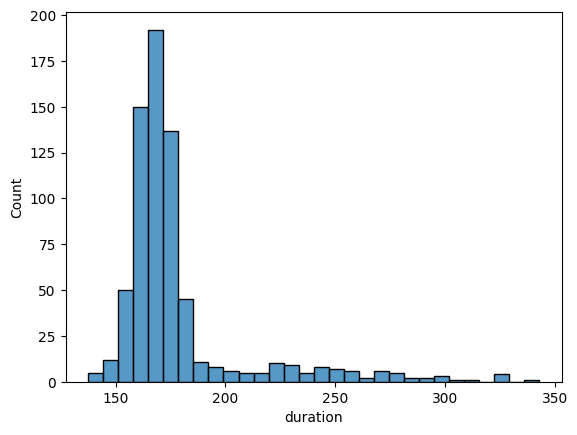

In [ ]:
import seaborn as sns

sns.histplot(data=hp_log[hp_log['duration'] < 400], x='duration', bins=30)

In [ ]:
hp_log['duration'].sum()/60

2081.6546867330867

In [ ]:
hp_log['duration'].mean()/60

2.9780467621360325